In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

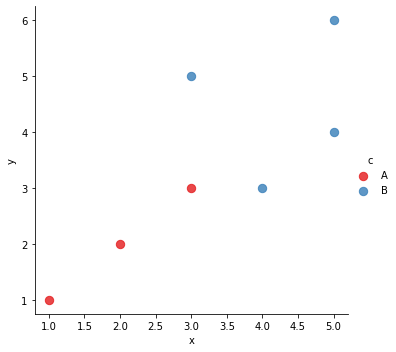

In [2]:
data = pd.read_csv("knn.csv")
sns.lmplot('x', 'y', data=data, hue='c', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.show()

In [3]:
def euclidean_distance(pt1, pt2, dimension):
    distance = 0
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x])
    return np.sqrt(distance)

<h3>K-Nearest Neighbors</h3>

In [4]:
def knn(training_points, test_point, k):
    distances = {}
    
    dimension = test_point.shape[1]
    
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x], dimension)
        distances[x] = dist[0]
    
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    
    neighbors = []
    
    for x in range(k):
        neighbors.append(sorted_d[x][0])
        
    class_counter = {}
    for x in range(len(neighbors)):
        cls = training_points.iloc[neighbors[x]][-1]
        
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls] = 1
    
    sorted_counter = sorted(class_counter.items(), key=operator.itemgetter(1), reverse=True)

    return (sorted_counter[0][0], neighbors)

In [5]:
test_set = [[3, 3.9]]
test = pd.DataFrame(test_set)
cls, neighbors = knn(data, test, 5)
print("Predicted Class: " + cls)

Predicted Class: B


k =  7
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
5  5  6  B
0  1  1  A
k =  5
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
k =  3
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
k =  1
Class A
Neighbors
   x  y  c
3  3  3  A


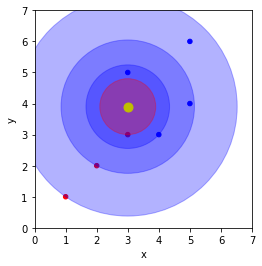

In [6]:
colors = ['r' if i == 'A' else 'b' for i in data['c']]
ax = data.plot(kind='scatter', x='x', y='y', c=colors)
plt.xlim(0, 7)
plt.ylim(0, 7)

plt.plot(test_set[0][0], test_set[0][1], "yo", markersize='9')

for k in range(7, 0, -2):
    cls, neighbors = knn(data, test, k)
    
    print("============")
    print("k = ", k)
    print("Class", cls)
    print("Neighbors")
    print(data.iloc[neighbors])
    
    furthest_point = data.iloc[neighbors].tail(1)
    
    radius = euclidean_distance(test, furthest_point.iloc[0], 2)
    
    c = 'r' if cls=='A' else 'b'
    circle = plt.Circle((test_set[0][0], test_set[0][1]), radius, color=c, alpha=0.3)
    ax.add_patch(circle)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<h3>Scikit-Learn's K-Neighbors Classifier class for KNN</h3>

<IPython.core.display.Javascript object>


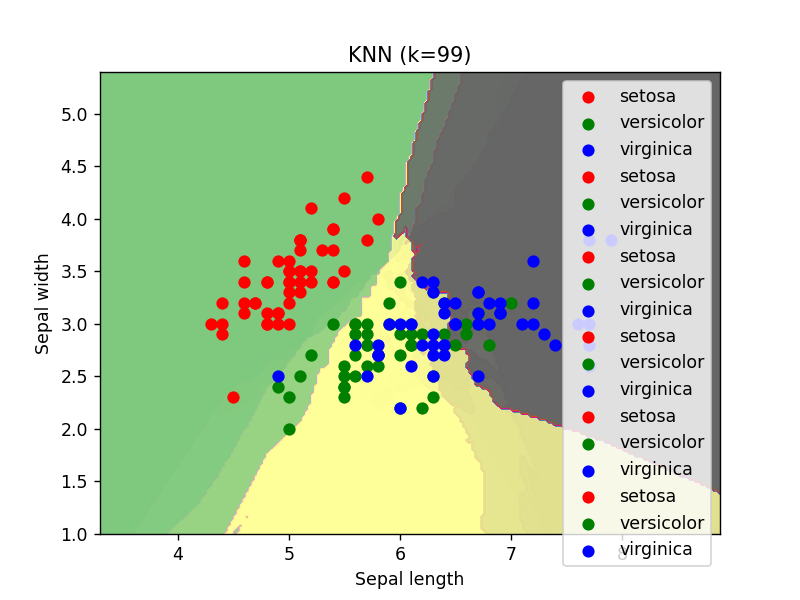

In [7]:
%matplotlib notebook
import matplotlib.patches as mpatches
from sklearn import svm, datasets

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

<h3> Different Values of K</h3>

<IPython.core.display.Javascript object>


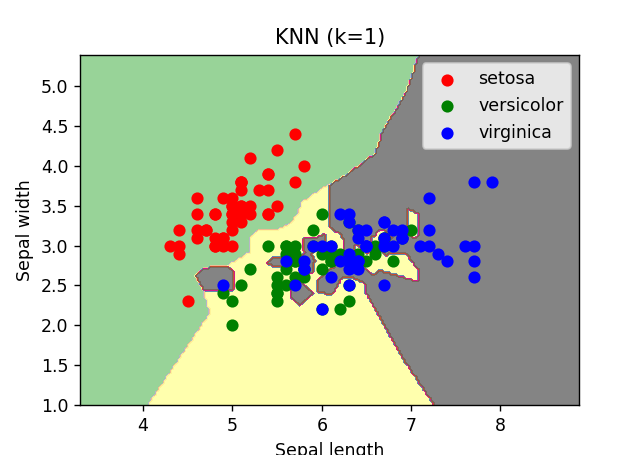

(array([0, 1, 2]), array([50, 51, 49], dtype=int64))


In [15]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = (x_max/ x_min) / 100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)

print(np.unique(predictions, return_counts=True))

<IPython.core.display.Javascript object>


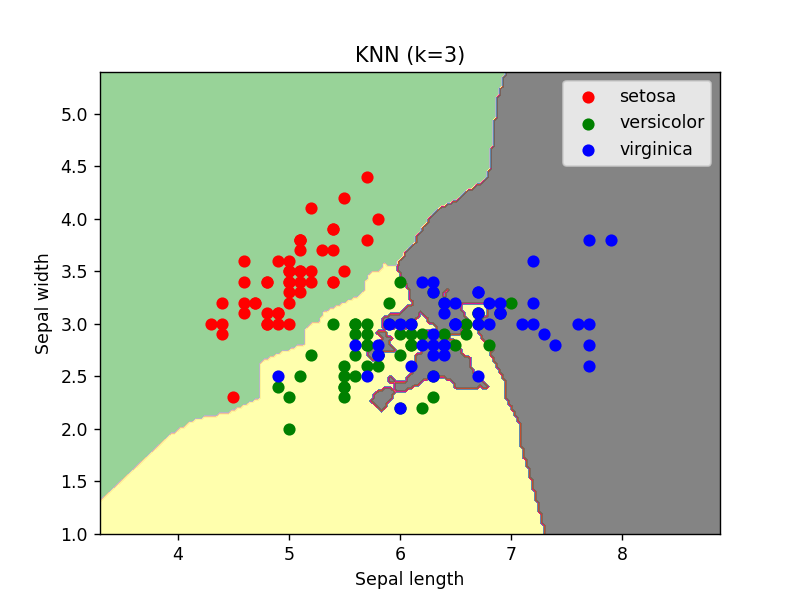

(array([0, 1, 2]), array([50, 44, 56], dtype=int64))


In [16]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)

print(np.unique(predictions, return_counts=True))

<IPython.core.display.Javascript object>


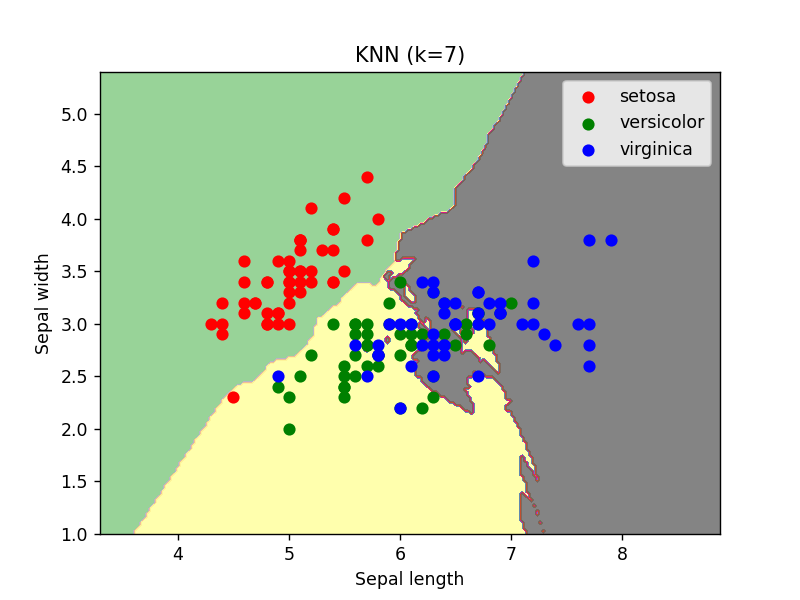

(array([0, 1, 2]), array([49, 52, 49], dtype=int64))


In [17]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)

print(np.unique(predictions, return_counts=True))

<IPython.core.display.Javascript object>


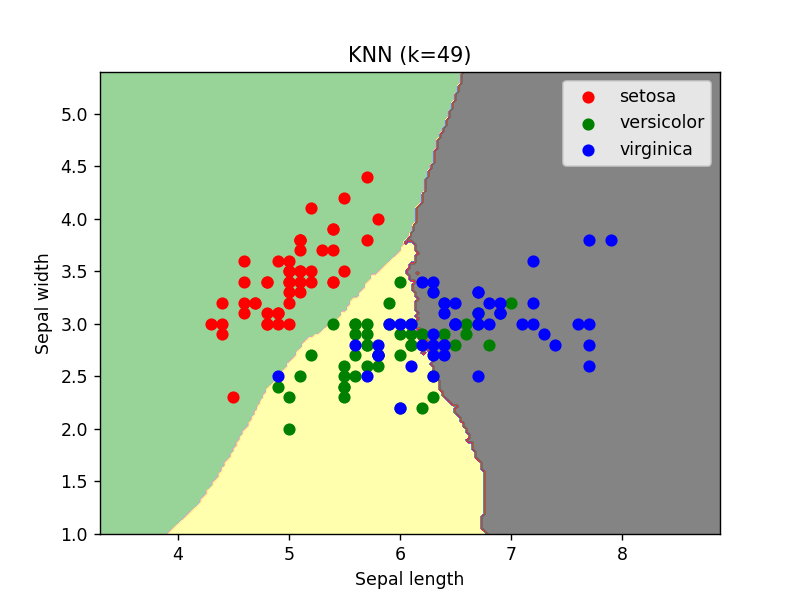

(array([0, 1, 2]), array([51, 49, 50], dtype=int64))


In [18]:
k = 49 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)

print(np.unique(predictions, return_counts=True))

<IPython.core.display.Javascript object>


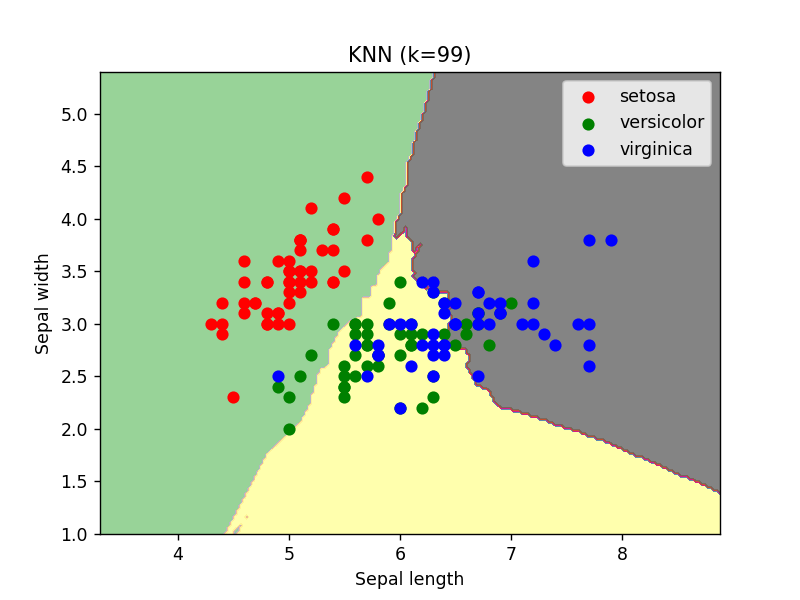

(array([0, 1, 2]), array([57, 58, 35], dtype=int64))


In [19]:
k = 99
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)

print(np.unique(predictions, return_counts=True))

<h3>Coress-Validation</h3>

In [32]:
from sklearn.model_selection import cross_val_score

#cross-validation score
cv_scores = []

X = iris.data[:, :4]
y = iris.target

folds = 10

ks =  list(range(1,int(len(X) * ((folds - 1)/folds))))
ks = [k for k in ks if k % 3 != 0]
print(ks)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134]
1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.940000000000

The optimal number of neighbors is 13


<IPython.core.display.Javascript object>


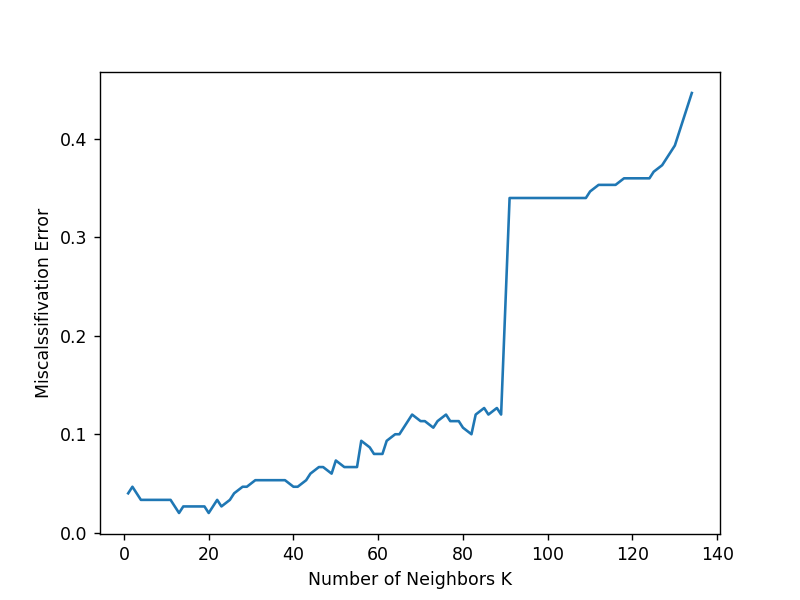

In [33]:
# misclassification error
MSE = [1 - x for x in cv_scores]

optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

plt.plot(ks, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Miscalssifivation Error")
plt.show()